In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import gc

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
sns.set_style("darkgrid")

In [2]:
df_build = pd.read_csv('building_metadata.csv')
df_weather_train = pd.read_csv('weather_train.csv')
df_train = pd.read_csv('train.csv')

In [3]:
df_build.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [4]:
df_weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [5]:
df_train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [6]:
print('Building Metadata', df_build.shape)
print('Train Data', df_train.shape)
print('Weather Train Data', df_weather_train.shape)

Building Metadata (1449, 6)
Train Data (20216100, 4)
Weather Train Data (139773, 9)


In [7]:
df_train.dtypes

building_id        int64
meter              int64
timestamp         object
meter_reading    float64
dtype: object

In [8]:
df_weather_train.dtypes

site_id                 int64
timestamp              object
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

Let's change the datatype of timestamp column to datetime format

In [2]:
def change_dtype(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
    return df

In [10]:
df_train = change_dtype(df_train)
df_weather_train = change_dtype(df_weather_train)

In [11]:
df_train = df_train.merge(df_build, on='building_id', how='left')
df_train = df_train.merge(df_weather_train, on=['site_id', 'timestamp'], how='left')

In [12]:
del df_build, df_weather_train
gc.collect()

33

In [3]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [14]:
df_train = reduce_mem_usage(df_train)

Mem. usage decreased to 1041.10 Mb (60.3% reduction)


In [15]:
df_train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


In [4]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
df_train.primary_use = le.fit_transform(df_train.primary_use)

In [18]:
df_train['timestamp'].max()

Timestamp('2016-12-31 23:00:00')

In [19]:
df_train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,0,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,0,2016-01-01,0.0,0,0,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,0,2016-01-01,0.0,0,0,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,0,2016-01-01,0.0,0,0,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,0,2016-01-01,0.0,0,0,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


In [5]:
def prepare_data(X, test=False):
    """
    Preparing final dataset with all features.
    """
    X.square_feet = np.log1p(X.square_feet)
    
    if not test:
        X.sort_values("timestamp", inplace=True)
        X.reset_index(drop=True, inplace=True)
    
    gc.collect()
    
    holidays = ["2016-01-01", "2016-01-18", "2016-02-15", "2016-05-30", "2016-07-04",
                "2016-09-05", "2016-10-10", "2016-11-11", "2016-11-24", "2016-12-26",
                "2017-01-01", "2017-01-16", "2017-02-20", "2017-05-29", "2017-07-04",
                "2017-09-04", "2017-10-09", "2017-11-10", "2017-11-23", "2017-12-25",
                "2018-01-01", "2018-01-15", "2018-02-19", "2018-05-28", "2018-07-04",
                "2018-09-03", "2018-10-08", "2018-11-12", "2018-11-22", "2018-12-25",
                "2019-01-01"]
    
    X["hour"] = X.timestamp.dt.hour
    X["weekday"] = X.timestamp.dt.weekday
    X['year'] = X.timestamp.dt.year
    X.fillna(-1, inplace=True)
    year_min = X.timestamp.min().year
    X['age'] = X['year'] - year_min
    X["is_holiday"] = (X.timestamp.dt.date.astype("str").isin(holidays)).astype(int)
    X["combined_temp_1"] = (X['air_temperature'] + X['dew_temperature'])/2
    X["combined_temp_2"] = X['air_temperature'] - X['dew_temperature']
    X['air_temperature'] = np.absolute(X['air_temperature'])
    X['dew_temperature'] = np.absolute(X['dew_temperature'])
    
    
    drop_features = ["timestamp", "sea_level_pressure", "wind_direction", "wind_speed", "precip_depth_1_hr",
                     "cloud_coverage", "floor_count", 'year', 'year_built']

    X.drop(drop_features, axis=1, inplace=True)

    if test:
        row_ids = X.row_id
        X.drop("row_id", axis=1, inplace=True)
        return X, row_ids
    else:
        y = np.log1p(X.meter_reading)
        X.drop("meter_reading", axis=1, inplace=True)
        return X, y

In [21]:
X, y = prepare_data(df_train)

del df_train
gc.collect()

24

In [22]:
X.sample(5)

,building_id,meter,site_id,primary_use,square_feet,air_temperature,dew_temperature,hour,weekday,age,is_holiday,combined_temp_1,combined_temp_2
11722766,718,0,5,0,10.160723,18.000000,18.000000,12,1,0,0,18.000000,0.000000
5670553,1259,1,14,0,11.171688,18.296875,5.601562,20,5,0,0,6.347656,23.906250
19610038,985,0,9,6,10.456194,9.398438,3.900391,7,2,0,0,2.750000,13.296875
12037409,1256,0,14,6,10.543181,21.703125,16.703125,4,0,0,0,19.203125,5.000000
19231927,960,1,9,0,10.935568,7.800781,3.900391,15,2,0,0,5.851562,3.900391


In [23]:
X.isna().sum()

building_id        0
meter              0
site_id            0
primary_use        0
square_feet        0
air_temperature    0
dew_temperature    0
hour               0
weekday            0
age                0
is_holiday         0
combined_temp_1    0
combined_temp_2    0
dtype: int64

In [24]:
X_1st_half =  X[:int(X.shape[0] / 2)]
X_2nd_half =  X[int(X.shape[0] / 2):]

y_1st_half = y[:int(X.shape[0] / 2)]
y_2nd_half = y[int(X.shape[0] / 2):]

In [25]:
del X, y
gc.collect()

98

In [6]:
import lightgbm as lgb
import random
from sklearn.metrics import mean_squared_error
random.seed(12)

In [27]:
categorical_features = ["building_id", "site_id", "meter", "primary_use", "hour", "weekday"]

d_1st = lgb.Dataset(X_1st_half, label=y_1st_half, categorical_feature=categorical_features, free_raw_data=False)
d_2nd = lgb.Dataset(X_2nd_half, label=y_2nd_half, categorical_feature=categorical_features, free_raw_data=False)

In [28]:
watchlist_1 = [d_1st, d_2nd]
watchlist_2 = [d_2nd, d_1st]

params = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 40,
    "learning_rate": 0.05,
    "feature_fraction": 0.85,
    "reg_lambda": 2,
    "metric": "rmse"
}

In [29]:
print("Building LGBM Model with with first 50 as train and last 50 as val:")
model_1st = lgb.train(params, train_set=d_1st, 
                         num_boost_round=1000, valid_sets=watchlist_1, 
                         verbose_eval=200, early_stopping_rounds=200)
print("Building LGBM Model with with 2nd 50 as train and first 50 as val:")
model_2nd = lgb.train(params, train_set=d_2nd, 
                         num_boost_round=1000, valid_sets=watchlist_2, 
                         verbose_eval=200, early_stopping_rounds=200)

Building LGBM Model with with first 50 as train and last 50 as val:
Training until validation scores don't improve for 200 rounds
[200]	training's rmse: 0.919755	valid_1's rmse: 1.34746
[400]	training's rmse: 0.866238	valid_1's rmse: 1.34561
Early stopping, best iteration is:
[291]	training's rmse: 0.885092	valid_1's rmse: 1.34405
Building LGBM Model with with 2nd 50 as train and first 50 as val:
Training until validation scores don't improve for 200 rounds
[200]	training's rmse: 0.907842	valid_1's rmse: 1.50881
[400]	training's rmse: 0.853981	valid_1's rmse: 1.50141
[600]	training's rmse: 0.830729	valid_1's rmse: 1.50044
Early stopping, best iteration is:
[505]	training's rmse: 0.841519	valid_1's rmse: 1.49993


In [11]:
import pickle

In [31]:
picfile = open('model_1st_3', 'wb') 
pickle.dump(model_1st, picfile)
picfile.close() 
picfile = open('model_2nd_3', 'wb') 
pickle.dump(model_2nd, picfile)
picfile.close() 

In [32]:
picfile = open('le_3', 'wb') 
pickle.dump(le, picfile)
picfile.close() 

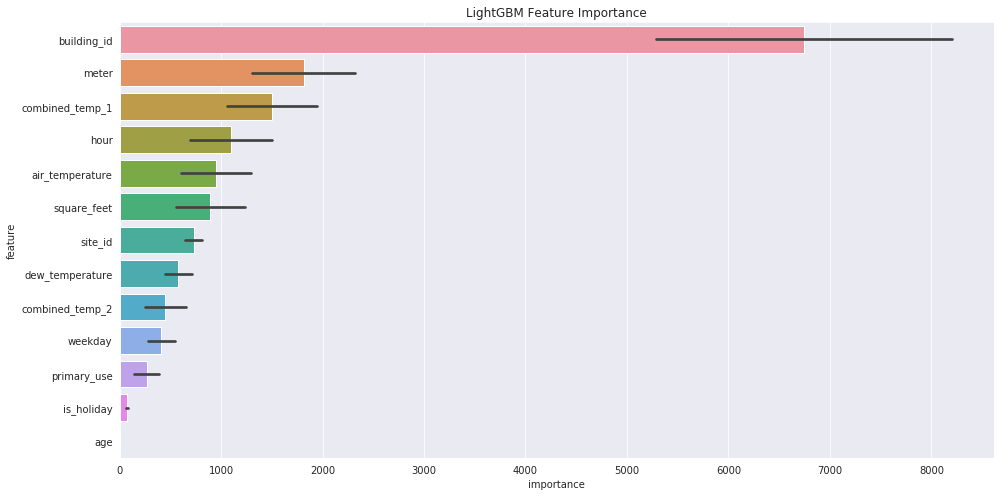

In [33]:
df_fimp_1 = pd.DataFrame()
df_fimp_1["feature"] = X_1st_half.columns.values
df_fimp_1["importance"] = model_1st.feature_importance()
df_fimp_1["half"] = 1

df_fimp_2 = pd.DataFrame()
df_fimp_2["feature"] = X_1st_half.columns.values
df_fimp_2["importance"] = model_2nd.feature_importance()
df_fimp_2["half"] = 2

df_fimp = pd.concat([df_fimp_1, df_fimp_2], axis=0)

plt.figure(figsize=(14, 7))
sns.barplot(x="importance", y="feature", data=df_fimp.sort_values(by="importance", ascending=False))
plt.title("LightGBM Feature Importance")
plt.tight_layout()

In [ ]:
del X_1st_half, X_2nd_half, y_1st_half, y_2nd_half, d_1st, d_2nd
gc.collect()

In [7]:
df_build = pd.read_csv('building_metadata.csv')
df_weather_test = pd.read_csv('weather_test.csv')
df_test = pd.read_csv('test.csv')

df_test = change_dtype(df_test)
df_weather_test = change_dtype(df_weather_test)

df_test = df_test.merge(df_build, on='building_id', how='left')
df_test = df_test.merge(df_weather_test, on=['site_id', 'timestamp'], how='left')

del df_build, df_weather_test
gc.collect()

20

In [8]:
df_test = reduce_mem_usage(df_test)

Mem. usage decreased to 2147.36 Mb (60.3% reduction)


In [9]:
gc.collect()

44

In [12]:
picfile = open('model_1st_3', 'rb') 
model_1st = pickle.load(picfile)
picfile.close()

picfile = open('model_2nd_3', 'rb') 
model_2nd = pickle.load(picfile)
picfile.close()

picfile = open('le_3', 'rb') 
le = pickle.load(picfile)
picfile.close() 

In [13]:
df_test.primary_use = le.transform(df_test.primary_use)

In [14]:
X_test, row_ids = prepare_data(df_test, test=True)
X_test.fillna(-1)
del df_test
gc.collect()

24

In [15]:
pred = np.expm1(model_1st.predict(X_test, num_iteration=model_1st.best_iteration)) / 2
del model_1st
gc.collect()
pred += np.expm1(model_2nd.predict(X_test, num_iteration=model_2nd.best_iteration)) / 2
del model_2nd
gc.collect()

12

In [16]:
submission = pd.DataFrame({"row_id": row_ids, "meter_reading": np.clip(pred, 0, a_max=None)})
submission.to_csv("submission.csv", index=False)

Final Public Leaderboard Score: __1.11__